In [7]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 1. NumPy: Array Manipulation

arr = np.array([[1, 2, 3], [4, 5, 6]])
print("Original array:\n", arr)
print("Shape:", arr.shape)
print("Transpose:\n", arr.T)
print("Element-wise square:\n", np.square(arr))
print("Mean of elements:", np.mean(arr))

Original array:
 [[1 2 3]
 [4 5 6]]
Shape: (2, 3)
Transpose:
 [[1 4]
 [2 5]
 [3 6]]
Element-wise square:
 [[ 1  4  9]
 [16 25 36]]
Mean of elements: 3.5


In [3]:
# 2. Pandas: Data Handling & Preprocessing

data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 32, 30, np.nan],
        'Gender': ['F', 'M', 'M', 'M']}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# Handling missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
print("\nAfter filling missing Age:\n", df)

# Encoding categorical variables
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
print("\nAfter encoding Gender:\n", df)

Original DataFrame:
       Name   Age Gender
0    Alice  25.0      F
1      Bob  32.0      M
2  Charlie  30.0      M
3    David   NaN      M

After filling missing Age:
       Name   Age Gender
0    Alice  25.0      F
1      Bob  32.0      M
2  Charlie  30.0      M
3    David  29.0      M

After encoding Gender:
       Name   Age  Gender
0    Alice  25.0       0
1      Bob  32.0       1
2  Charlie  30.0       1
3    David  29.0       1


/tmp/ipython-input-3-2835562604.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [4]:
# 3. SciPy: Mathematical Functions

# Generate normal distribution and calculate statistics
sample = np.random.normal(loc=0, scale=1, size=1000)
mean = np.mean(sample)
std_dev = np.std(sample)
kurtosis = stats.kurtosis(sample)
skew = stats.skew(sample)

print(f"Mean: {mean:.2f}, Std Dev: {std_dev:.2f}")
print(f"Kurtosis: {kurtosis:.2f}, Skewness: {skew:.2f}")

Mean: -0.05, Std Dev: 0.99
Kurtosis: 0.17, Skewness: 0.04


In [5]:
# 4. Scikit-learn: Basic ML Workflow

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



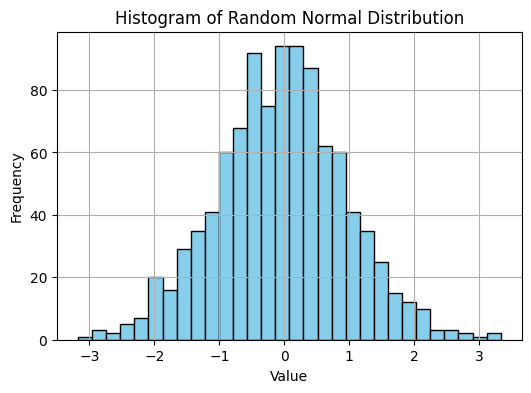

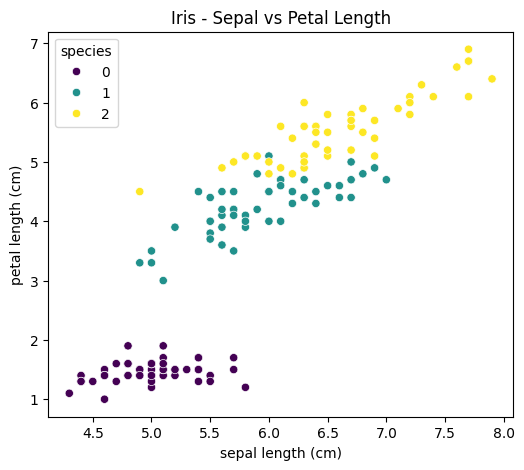

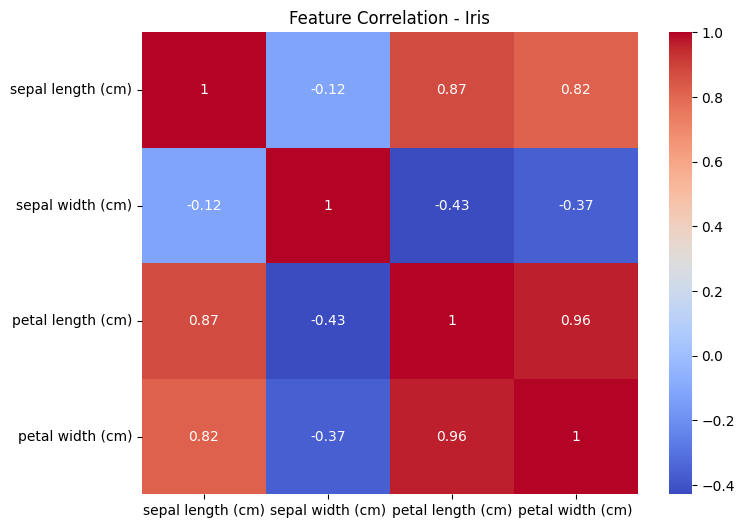

In [6]:
# 5. Matplotlib & Seaborn: Visualizations

# Histogram
plt.figure(figsize=(6, 4))
plt.hist(sample, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Random Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Scatter plot (Iris dataset)
df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris['species'] = y
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_iris, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='viridis')
plt.title("Iris - Sepal vs Petal Length")
plt.show()

# Heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_iris.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation - Iris")
plt.show()